In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img(r'D:\VS Code\CNN\Training\Happy\brooke-cagle-k9XZPpPHDho-unsplash.jpg', target_size=(150, 150))

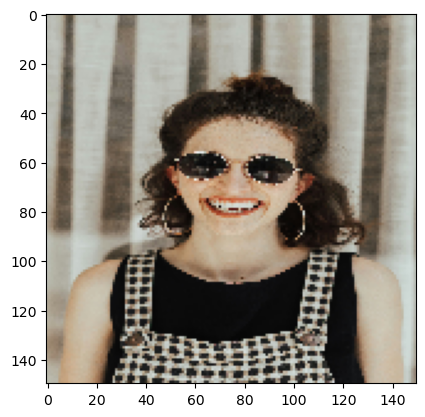

In [3]:
plt.imshow(img)

In [4]:
il = cv2.imread(r'D:\VS Code\CNN\Training\Happy\brooke-cagle-k9XZPpPHDho-unsplash.jpg')
il

array([[[184, 191, 188],
        [182, 189, 186],
        [181, 188, 185],
        ...,
        [184, 191, 188],
        [184, 191, 188],
        [184, 191, 188]],

       [[184, 191, 188],
        [184, 191, 188],
        [183, 190, 187],
        ...,
        [185, 192, 189],
        [184, 191, 188],
        [183, 190, 187]],

       [[184, 191, 188],
        [185, 192, 189],
        [185, 192, 189],
        ...,
        [185, 192, 189],
        [184, 191, 188],
        [184, 191, 188]],

       ...,

       [[179, 191, 191],
        [178, 190, 190],
        [175, 187, 187],
        ...,
        [124, 137, 151],
        [122, 135, 149],
        [121, 134, 148]],

       [[179, 191, 191],
        [178, 190, 190],
        [176, 188, 188],
        ...,
        [124, 137, 151],
        [123, 136, 150],
        [124, 137, 151]],

       [[176, 188, 188],
        [176, 188, 188],
        [177, 189, 189],
        ...,
        [124, 137, 151],
        [123, 136, 150],
        [127, 140, 154]]

In [5]:
il.shape

(5472, 3648, 3)

In [22]:
train = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation = ImageDataGenerator(rescale=1/200)

In [23]:
train_dataset = train.flow_from_directory(r'D:\VS Code\CNN\Training', target_size=(200, 200),batch_size=32, class_mode='binary')

Found 10 images belonging to 2 classes.


In [24]:
validation_dataset = validation.flow_from_directory(r'D:\VS Code\CNN\Validation', target_size=(200, 200),batch_size=32, class_mode='binary')

Found 0 images belonging to 2 classes.


In [25]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [26]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [27]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [41]:
model_fit = model.fit(train_dataset, epochs=30)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8000 - loss: 0.3152
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8000 - loss: 0.4703
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6000 - loss: 1.0869
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9000 - loss: 0.4458
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9000 - loss: 0.3334
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9000 - loss: 0.3401
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9000 - loss: 0.3212
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9000 - loss: 0.2217
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9000 - loss: 0.2883
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9000 - loss: 0.2310
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9000 - loss: 0.3086
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8000 - loss: 0.4082
Epoch 13/30
1/1 ━━━━━

In [42]:
dir_path = r'D:\VS Code\CNN\Testing'
for i in os.listdir(dir_path):
    print(i)

1.jpg
10.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


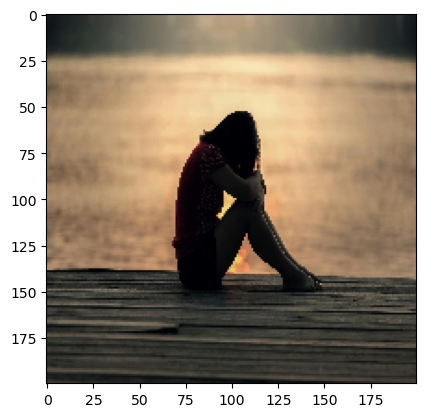

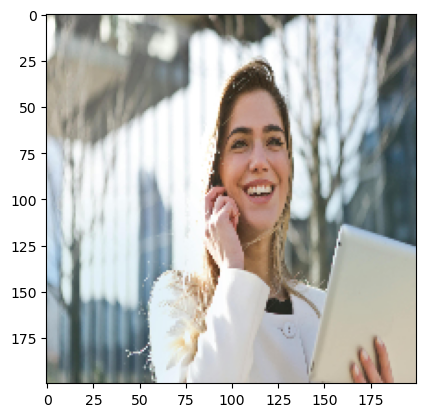

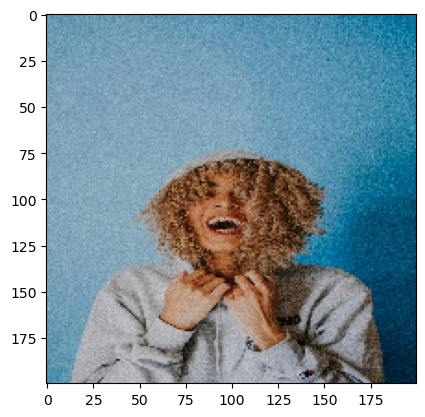

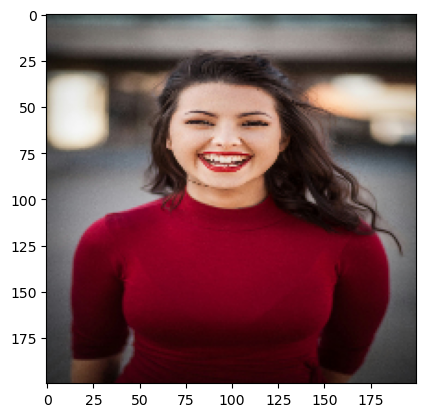

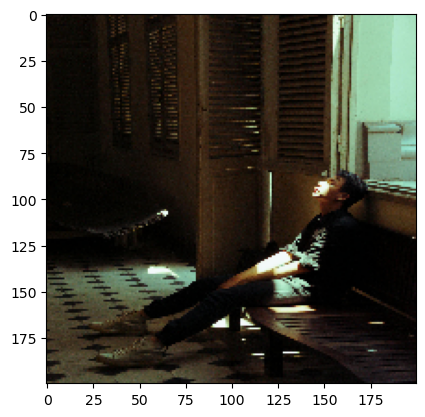

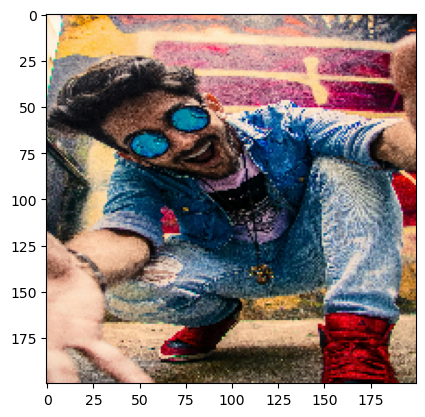

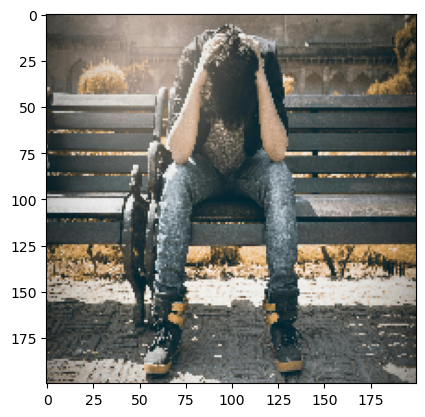

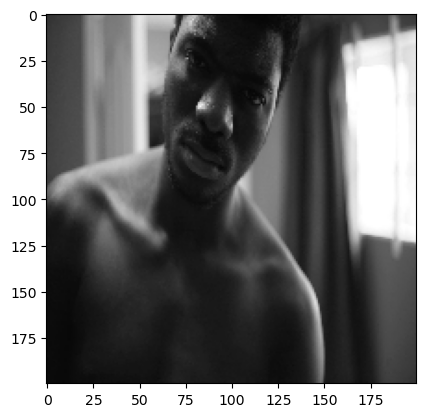

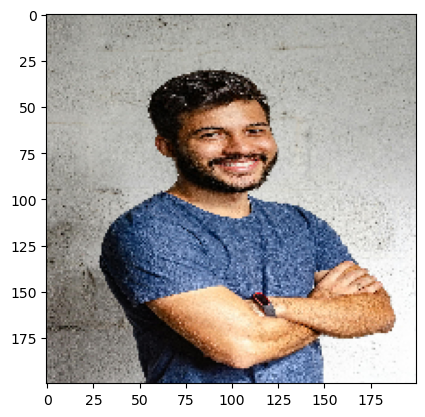

In [43]:
dir_path = r'D:\VS Code\CNN\Testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '\\' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()


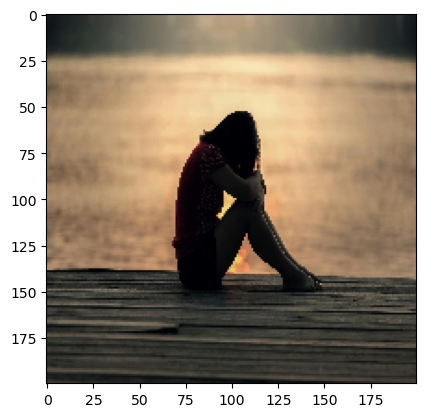

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Happy


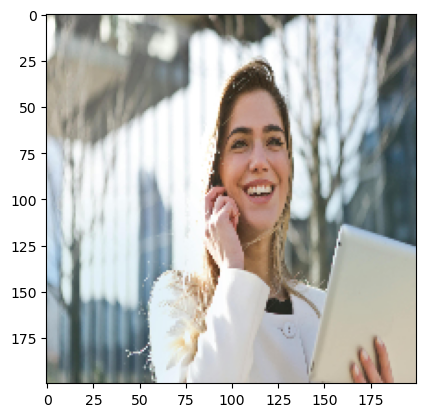

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Happy


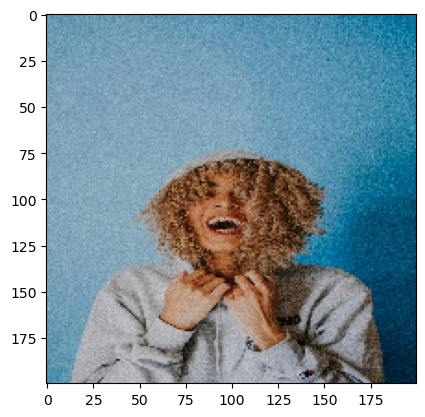

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Happy


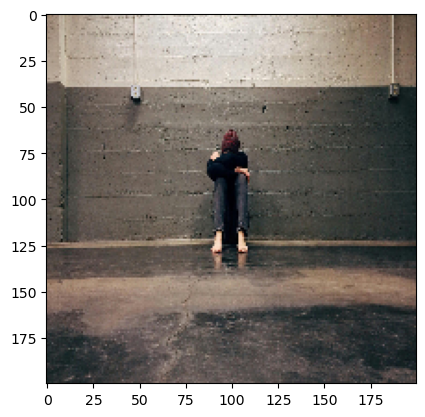

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Happy


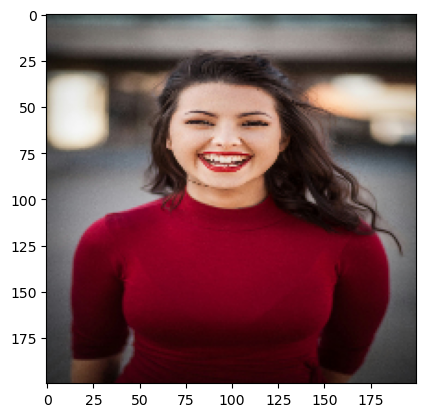

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Happy


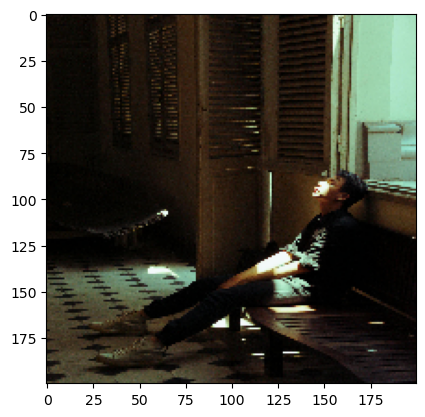

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Sad


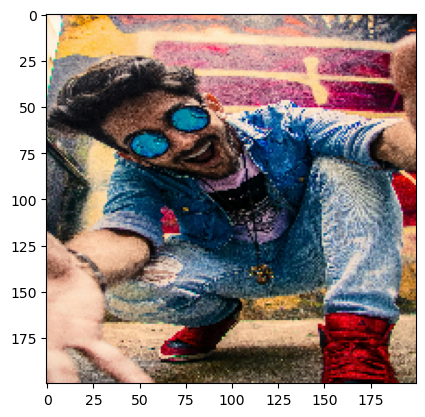

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Happy


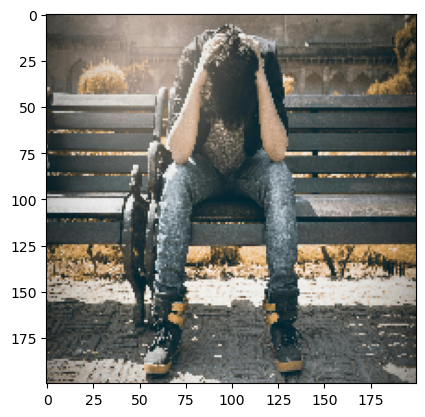

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Happy


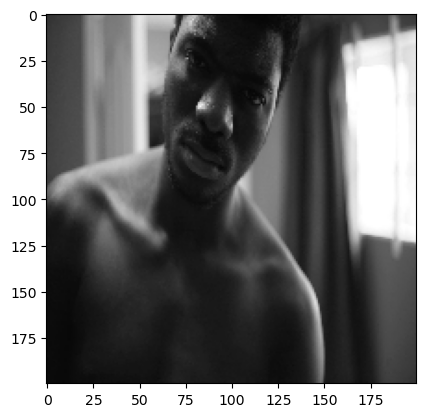

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Happy


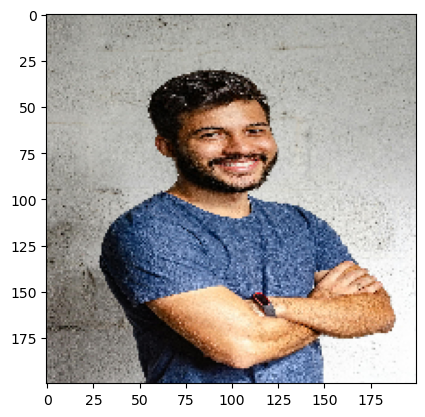

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Happy


In [44]:
dir_path = r'D:\VS Code\CNN\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( 'Happy')
    else:
        print('Sad')

In [45]:
model.save("emotion_model.h5")